[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hashimzadasamad/tensorflow_regression_model/blob/main/01_neural_network_regression_with_tensorflow.ipynb)

# Introduction to Regression with Neural Networks in TesorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

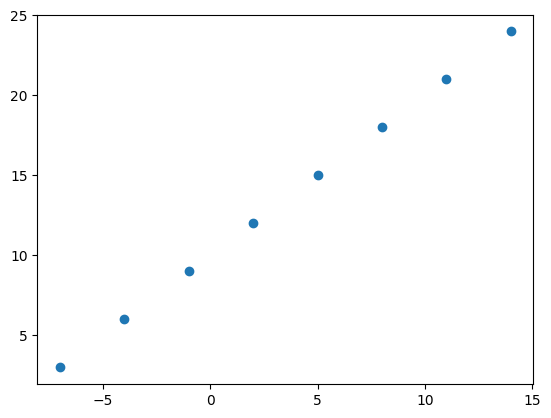

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create feaatures
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Crate labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction promblem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:










X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
#Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

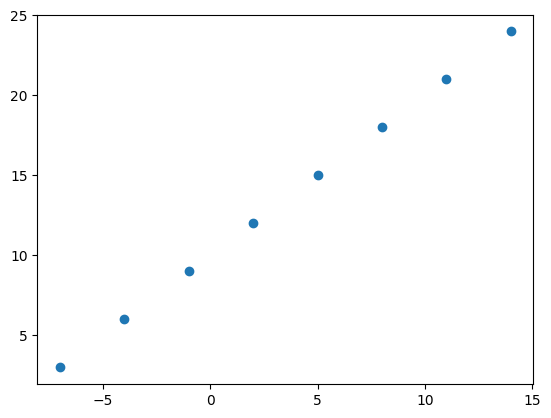

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

In [ ]:
# Set random seed
tf.random.set_seed(42
                   )
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.6800 - mae: 11.6800
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.5475 - mae: 11.5475
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.4150 - mae: 11.4150
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.2825 - mae: 11.2825
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 11.1500 - mae: 11.1500


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 297ms/step


array([[11.865227]], dtype=float32)

In [ ]:
y_pred + 11

array([[22.865227]], dtype=float32)

## Improving our model

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 584ms/step - loss: 22.0304 - mae: 22.0304
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 21.6372 - mae: 21.6372
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 21.2441 - mae: 21.2441
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 20.8510 - mae: 20.8510
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 20.4780 - mae: 20.4780
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 20.1968 - mae: 20.1968
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 19.9155 - mae: 19.9155
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 19.6343 - mae: 19.6343
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 19.3530 - mae: 19.3530
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 19.0718 - mae: 19.0718
Epoch 11/100
1/1 [==============================

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model prediction improved...
model.predict([17.0])

1/1 [==============================] - 0s 410ms/step


array([[29.662405]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.6255 - mae: 13.6255
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.9405 - mae: 12.9405
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 12.2548 - mae: 12.2548
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 11.5652 - mae: 11.5652
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 10.8684 - mae: 10.8684
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 10.1627 - mae: 10.1627
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 9.4465 - mae: 9.4465
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 8.7181 - mae: 8.7181
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 7.9755 - mae: 7.9755
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.2163 - mae: 7.2163
Epoch 11/100
1/1 [==============================] - 0s 24ms

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 140ms/step


array([[27.21422]], dtype=float32)

## Evaluating a model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

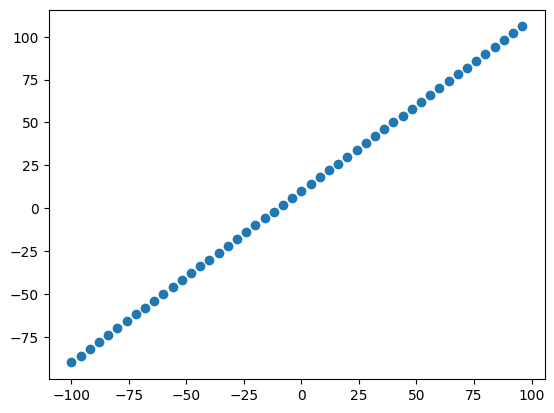

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%  of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

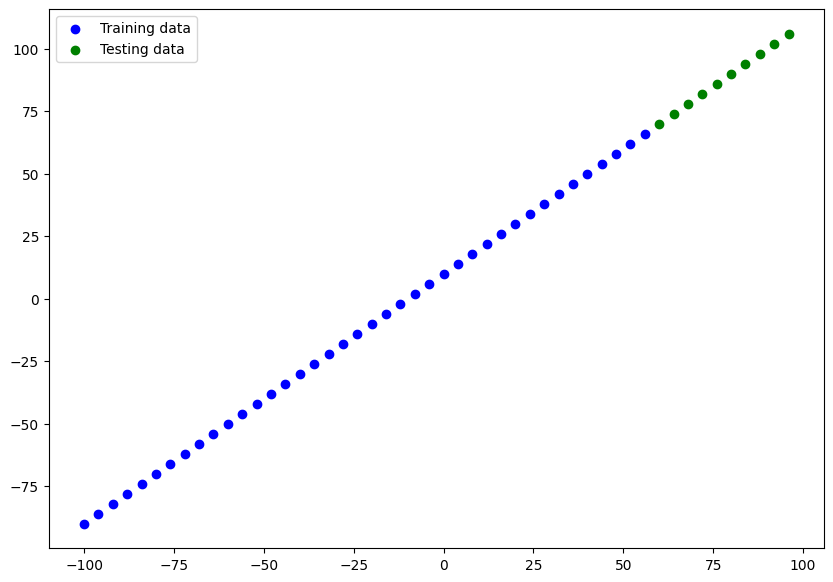

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expnad_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically  by defining input_shape argument in the first layer
tf.random.set_seed(42)
# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],  name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


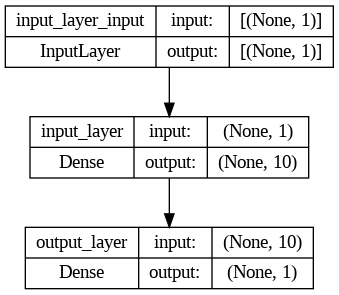

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [ ]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 198ms/step


array([[ 70.38918 ],
       [ 74.96695 ],
       [ 79.544716],
       [ 84.12249 ],
       [ 88.70027 ],
       [ 93.27804 ],
       [ 97.855804],
       [102.433586],
       [107.011345],
       [111.58912 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's crate a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and cpmpares predictions to grpound truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show thew legend
  plt.legend();

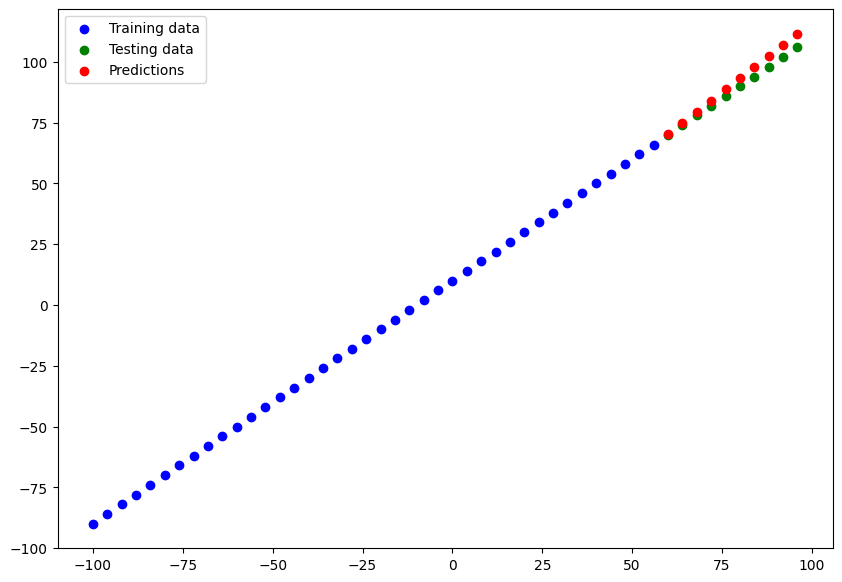

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 308ms/step - loss: 2.9891 - mae: 2.9891


[2.989144802093506, 2.989144802093506]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.688654 , 14.2198305, 11.782114 , 10.375502 , 10.       ,
       10.655607 , 12.342321 , 15.146869 , 19.011345 , 23.589119 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.38918 ],
       [ 74.96695 ],
       [ 79.544716],
       [ 84.12249 ],
       [ 88.70027 ],
       [ 93.27804 ],
       [ 97.855804],
       [102.433586],
       [107.011345],
       [111.58912 ]], dtype=float32)>

In [ ]:

y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.38918 ,  74.96695 ,  79.544716,  84.12249 ,  88.70027 ,
        93.27804 ,  97.855804, 102.433586, 107.011345, 111.58912 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9891503>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.689031>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

**Build mode_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 26ms/step - loss: 10.0168 - mae: 10.0168
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0408 - mae: 11.0408
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.0756 - mae: 16.0756
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5347 - mae: 8.5347
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9461 - mae: 10.9461
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1144 - mae: 10.1144
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1414 - mae: 9.1414
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1049 - mae: 9.1049
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 15.1449 - mae: 15.1449
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5575 - mae: 7.5575
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 51ms/step


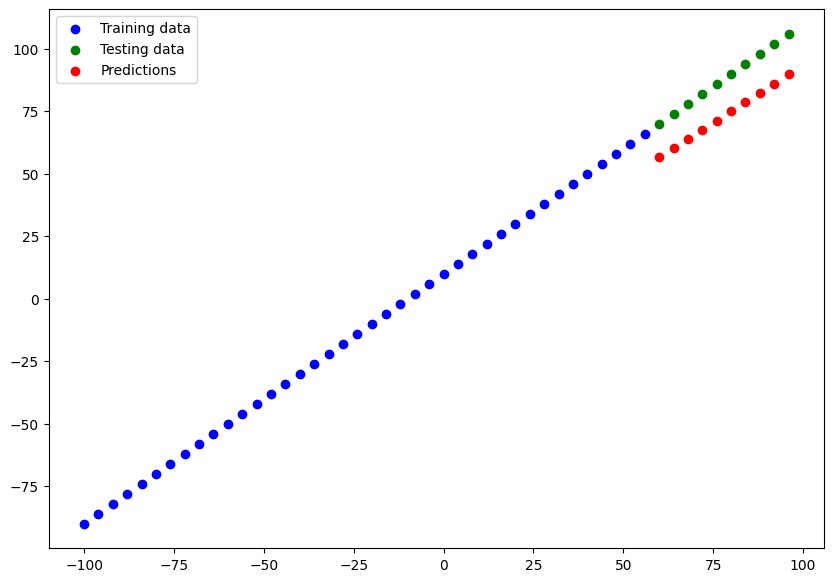

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.853754>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.45761>)

**Build mode_2**

2 dense layers, trained for 100 epochs


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create thge model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 14.6728 - mse: 300.4825
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 23.7665 - mse: 881.9297
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 18.9441 - mse: 524.2715
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7800 - mse: 249.6567
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.3169 - mse: 299.1889
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 12.1696 - mse: 182.8544
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4806 - mse: 160.5524
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2164 - mse: 175.7100
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.9670 - mse: 2809.9604
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.1703 - mse: 1203.3584
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 228ms/step


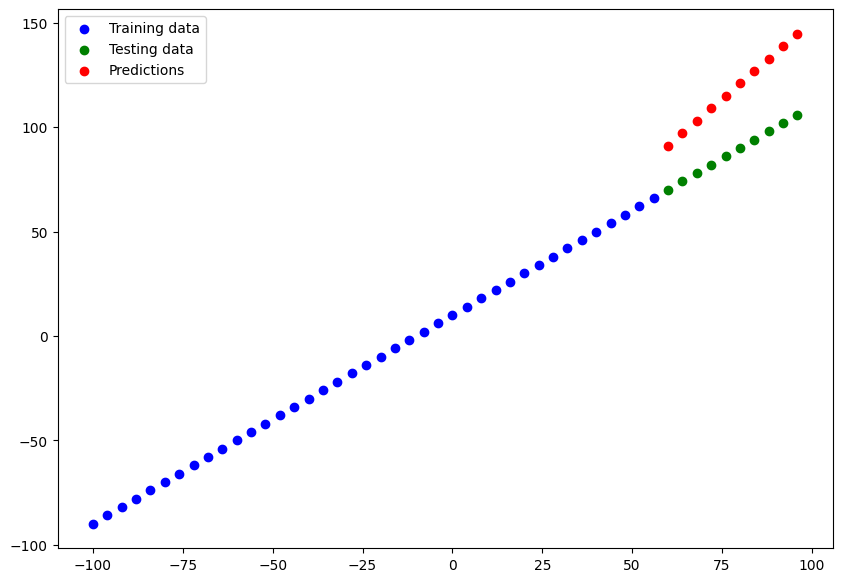

In [ ]:
# make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluatuion meterics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.953125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=928.6704>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random see
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# 3. Fit hte model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 56.3999 - mae: 56.3999
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 30.2182 - mae: 30.2182
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 34.6176 - mae: 34.6176
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 30.6253 - mae: 30.6253
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.5875 - mae: 15.5875
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.3657 - mae: 12.3657
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6475 - mae: 11.6475
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0550 - mae: 12.0550
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 37.6953 - mae: 37.6953
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 25.3320 - mae: 25.3320
Epoch 11/500
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 87ms/step


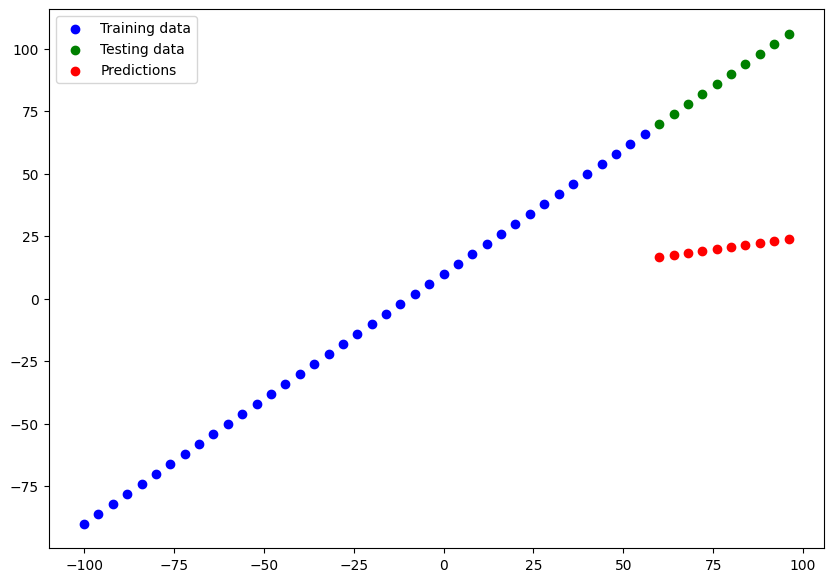

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluations metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.66178>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4662.1914>)

### Comparing the results of our experiments

In [ ]:
# Let's compare our model's results using  pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.853754,221.457611
1,model_2,29.953125,928.670410
2,model_3,67.661781,4662.191406


Looks like `model_2` performed best...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving our models

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save the model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

### Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comape model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 77ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Loading a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 93ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downlaod a model (or any other file) from Google Colab

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (it requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 best_model_HDF5_format.h5  'CV - Samad Hashimzada.pdf'
 car-sales.csv		    'CV Samad Hashimzada.pdf'
'Colab Notebooks'	    'SAMAD HASHİMZADE CV.pdf'


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y),len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8807.0977 - mae: 8807.0977
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.7241 - mae: 7875.7241
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7506.2168 - mae: 7506.2168
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7790.2241 - mae: 7790.2241
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7700.9546 - mae: 7700.9546
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.3555 - mae: 7608.3555
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.2720 - mae: 7573.2720
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7808.1064 - mae: 7808.1064
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7515.1924 - mae: 7515.1924
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.9229 - mae: 7732.9229

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7702.2637 - mae: 7702.2637


[7702.263671875, 7702.263671875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing very well... let's try and improve it

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13269.5400 - mae: 13269.5400
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13078.1836 - mae: 13078.1836
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12689.8379 - mae: 12689.8379
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11949.5107 - mae: 11949.5107
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10753.2119 - mae: 10753.2119
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9292.3838 - mae: 9292.3838
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8027.6104 - mae: 8027.6104
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7504.0601 - mae: 7504.0601
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.9683 - mae: 7429.9683
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.1060 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4787.7261 - mae: 4787.7261


[4787.72607421875, 4787.72607421875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7702.2637 - mae: 7702.2637


[7702.263671875, 7702.263671875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13301.9824 - mae: 13301.9824
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13153.3760 - mae: 13153.3760
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12846.3760 - mae: 12846.3760
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12236.2109 - mae: 12236.2109
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11176.9043 - mae: 11176.9043
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9737.4980 - mae: 9737.4980
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8332.8486 - mae: 8332.8486
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7575.9048 - mae: 7575.9048
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7427.9775 - mae: 7427.9775
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7405.6924 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3497.4009 - mae: 3497.4009


[3497.40087890625, 3497.40087890625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7702.2637 - mae: 7702.2637


[7702.263671875, 7702.263671875]

Text(0.5, 0, 'epochs')

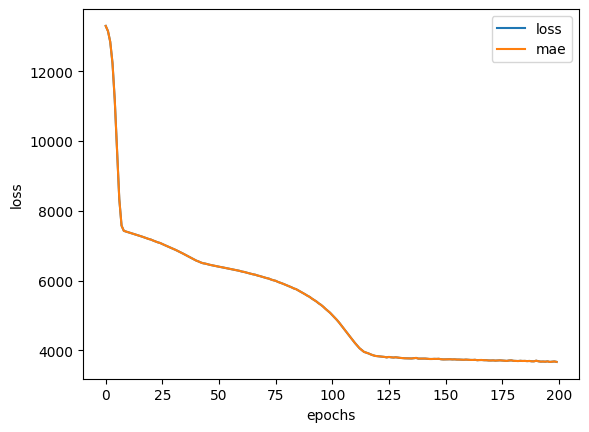

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

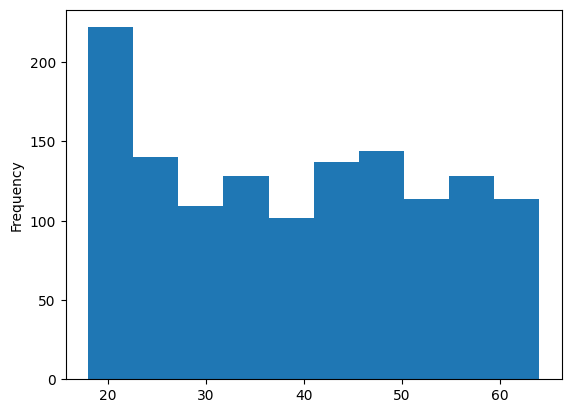

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

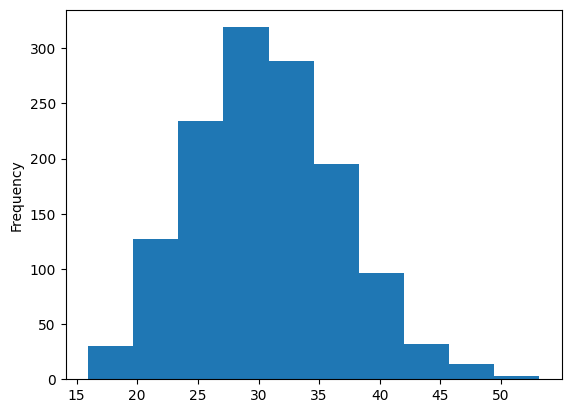

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in this columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Tranforming training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data segt has been normalized and one hot encoded. Now let's built a neural network  model  on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13342.5762 - mae: 13342.5762
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13331.7939 - mae: 13331.7939
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13306.1279 - mae: 13306.1279
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13253.5332 - mae: 13253.5332
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 13162.6045 - mae: 13162.6045
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13022.9414 - mae: 13022.9414
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 12824.8066 - mae: 12824.8066
Epoch 8/100
34/34 [==============================] - 0s 9ms/step - loss: 12558.3701 - mae: 12558.3701
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 12213.6553 - mae: 12213.6553
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 11790.73

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3435.9238 - mae: 3435.9238


[3435.923828125, 3435.923828125]